In [3]:
!pip --quiet install pydot

In [ ]:
!python.exe -m pip install --upgrade pip

In [4]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [10]:
import os
print(os.getcwd())

c:\Users\sahil\Sahil's Data\CODES\GitHub\ML-Enabled-WiFi-Saturation-Sensing\src


In [11]:
df = pd.read_csv("dataset/dataset_new.csv", header=None)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.0065,0.0130,0.0195,0.0260,0.0325,0.0390,0.0455,0.0520,0.0585,0.0650,...,0.0316,0.0368,0.0312,0.0000,0.0316,0.0364,0.0304,0.0604,0.9960,1
1,0.0263,0.0526,0.0789,0.1052,0.1316,0.1579,0.1842,0.2105,0.2368,0.2631,...,0.0316,0.0368,0.0312,0.0000,0.0316,0.0364,0.0304,0.0604,0.9960,1
2,0.0176,0.0352,0.0528,0.0704,0.0881,0.1057,0.1233,0.1409,0.1585,0.1761,...,0.0316,0.0368,0.0312,0.0312,0.0316,0.0299,0.0304,0.0604,0.9957,1
3,0.0222,0.0444,0.0666,0.0888,0.1110,0.1332,0.1554,0.1776,0.1998,0.2220,...,0.0316,0.0307,0.0312,0.0000,0.0360,0.0364,0.0304,0.0604,0.9900,1
4,0.0189,0.0379,0.0568,0.0758,0.0947,0.1137,0.1326,0.1516,0.1705,0.1895,...,0.0316,0.0368,0.0312,0.0000,0.0316,0.0364,0.0304,0.0604,0.9862,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0639,0.1278,0.1918,0.2557,0.3196,0.3835,0.4474,0.5114,0.5753,0.6392,...,0.0000,0.0000,0.0000,0.0028,0.0284,0.0076,0.0048,0.1793,0.9856,0
19996,0.0830,0.1659,0.2489,0.3318,0.4148,0.4977,0.5807,0.6637,0.7466,0.8296,...,0.0000,0.0000,0.0000,0.0028,0.0284,0.0076,0.0048,0.1793,0.9849,0
19997,0.0854,0.1709,0.2563,0.3417,0.4272,0.5126,0.5980,0.6835,0.7689,0.8543,...,0.0000,0.0000,0.0000,0.0028,0.0284,0.0076,0.0048,0.1793,0.9825,0
19998,0.0648,0.1296,0.1945,0.2593,0.3241,0.3889,0.4537,0.5186,0.5834,0.6482,...,0.0000,0.0000,0.0000,0.0277,0.0284,0.0076,0.0048,0.1793,0.9782,0


In [13]:
df.shape

(20000, 55)

In [14]:
import tensorflow as tf
import numpy as np
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [15]:
def normalize_data(data):
    data = np.transpose(data)
    scalar = MinMaxScaler((0,1))
    scalar.fit(data)
    data = scalar.transform(data)
    output = np.transpose(data)
    return output

In [16]:
classes = ['Unsaturated', 'Saturated']
num_classes = len(classes)
in_dim = [2, 13]
X = df.iloc[:,0:26].to_numpy()
Y = df.iloc[:,26:52].to_numpy()
Label = df.iloc[:,54].to_numpy()
Label_cat = tf.keras.utils.to_categorical(Label,num_classes)

In [17]:
np.random.seed(seed=int(time.time()))
n_examples = X.shape[0]
n_train = n_examples * 0.7
train_idx = np.random.choice(range(0,n_examples), size=int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test = X[test_idx]
Y_train = Y[train_idx]
Y_test = Y[test_idx]
Label_train = Label_cat[train_idx]
Label_test = Label_cat[test_idx]

In [18]:
def get_model(X_shape, Y_shape, classes, verbose):

    dr = 0.40
    model_X = tf.keras.models.Sequential()
    model_X.add(layers.Reshape((X_shape, 1), input_shape=(X_shape, ) ))
    model_X.add(layers.Conv1D(32, 3, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
    model_X.add(layers.BatchNormalization())

    model_X.add(layers.Conv1D(16, 2, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
    model_X.add(layers.Flatten())
    model_X.add(layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
    model_X.add(layers.Dropout(dr))
    model_X.add(layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
    model_X.add(layers.Dropout(dr))

    model_Y = tf.keras.models.Sequential()
    model_Y.add(layers.Reshape((Y_shape, 1), input_shape=(Y_shape, ) ))
    model_Y.add(layers.Conv1D(32, 3, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01) ))
    model_Y.add(layers.BatchNormalization())

    model_Y.add(layers.Conv1D(16, 2, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
    model_Y.add(layers.Flatten())
    model_Y.add(layers.Dropout(dr))
    model_Y.add(layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01) ))
    model_Y.add(layers.Dropout(dr))
    model_Y.add(layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
    model_Y.add(layers.Dropout(dr))


    merged = tf.keras.layers.Concatenate(axis=1)([model_X.output, model_Y.output])
    merged = layers.Dense(256,activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))(merged)
    merged = layers.Dropout(dr)(merged)
    merged = layers.Dense(128,activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))(merged)
    merged = layers.Dropout(dr)(merged)
    merged = layers.Dense(len(classes), activation=tf.nn.softmax, name='class_output')(merged)

    model = tf.keras.models.Model([model_X.input,model_Y.input], merged)

    if(verbose):
        from tensorflow.keras.utils import plot_model
        from IPython.display import Image
        plot_model(model, to_file='model.png', show_shapes=True)

    print("--Model created")
    return model

In [19]:
model = get_model(X.shape[1], Y.shape[1], classes, verbose=1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
--Model created


In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 reshape_1_input (InputLayer)   [(None, 26)]         0           []                               
                                                                                                  
 reshape_input (InputLayer)     [(None, 26)]         0           []                               
                                                                                                  
 reshape_1 (Reshape)            (None, 26, 1)        0           ['reshape_1_input[0][0]']        
                                                                                                  
 reshape (Reshape)              (None, 26, 1)        0           ['reshape_input[0][0]']          
                                                                                              

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss= 'categorical_crossentropy', metrics=['accuracy']  )

In [22]:
savedir = 'model_LTE_WiFi_coexistance_histogram.h5'
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0, patience = 20, verbose = 0, mode = 'auto')
checkpoint = tf.keras.callbacks.ModelCheckpoint(savedir, monitor = 'loss', verbose = 1, save_best_only = True, mode = 'min')
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=0.00001, cooldown=0, min_lr=0.0001)
nb_epoch = 5000
batch_size = 16
history = model.fit(x = [X_train, Y_train], y = Label_train ,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    validation_data = ([X_test, Y_test], Label_test),
                    shuffle=True,
                    verbose=2,
                    callbacks = [early_stop, checkpoint, reduce_lr_callback] )

Epoch 1/5000

Epoch 1: loss improved from inf to 1.46817, saving model to model_LTE_WiFi_coexistance_histogram.h5
875/875 - 9s - loss: 1.4682 - accuracy: 0.9334 - val_loss: 0.2715 - val_accuracy: 0.9598 - lr: 0.0010 - 9s/epoch - 10ms/step
Epoch 2/5000

Epoch 2: loss improved from 1.46817 to 0.26801, saving model to model_LTE_WiFi_coexistance_histogram.h5
875/875 - 6s - loss: 0.2680 - accuracy: 0.9522 - val_loss: 0.2337 - val_accuracy: 0.9547 - lr: 0.0010 - 6s/epoch - 6ms/step
Epoch 3/5000

Epoch 3: loss improved from 0.26801 to 0.25061, saving model to model_LTE_WiFi_coexistance_histogram.h5
875/875 - 6s - loss: 0.2506 - accuracy: 0.9520 - val_loss: 0.2446 - val_accuracy: 0.9538 - lr: 0.0010 - 6s/epoch - 6ms/step
Epoch 4/5000

Epoch 4: loss improved from 0.25061 to 0.23669, saving model to model_LTE_WiFi_coexistance_histogram.h5
875/875 - 6s - loss: 0.2367 - accuracy: 0.9545 - val_loss: 0.2135 - val_accuracy: 0.9693 - lr: 0.0010 - 6s/epoch - 6ms/step
Epoch 5/5000

Epoch 5: loss improve

KeyboardInterrupt: 

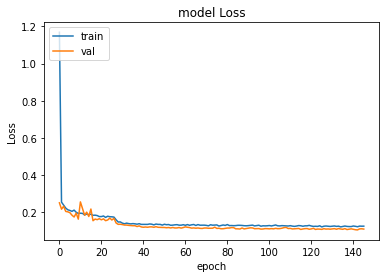

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


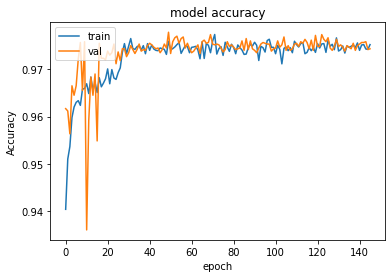

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Plot Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

375/375 [==============================] - 2s 3ms/step


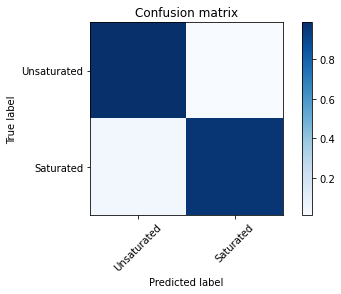

In [ ]:
X = [X_test, Y_test]

test_Y_hat = model.predict(X, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm1 = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Label_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm1[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm1, labels=classes)

In [ ]:
print(confnorm1)

[[0.98735441 0.01264559]
 [0.03873122 0.96126878]]


In [ ]:
y_pred=model.predict([X_test, Y_test])

188/188 [==============================] - 2s 7ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=-1)

In [ ]:
Label_test = np.argmax(Label_test, axis=-1)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Label_test, y_pred))

Accuracy: 0.9743333333333334


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('model_LTE_WiFi_coexistance_histogram.h5')

In [ ]:
batch_size = 512

In [ ]:
import pandas as pd
df = pd.read_csv("generality.csv", header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.0339,0.0677,0.1016,0.1355,0.1694,0.2032,0.2371,0.2710,0.3049,0.3387,...,0.0080,0.0028,0.0008,0.0004,0.0005,0.0000,0.0004,0.0458,0.7891,1.0
1,0.0159,0.0319,0.0478,0.0637,0.0796,0.0956,0.1115,0.1274,0.1434,0.1593,...,0.0016,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0451,0.8106,1.0
2,0.0064,0.0128,0.0192,0.0256,0.0320,0.0384,0.0448,0.0512,0.0576,0.0640,...,0.0090,0.0096,0.0048,0.0010,0.0016,0.0008,0.0012,0.0459,8732.0000,1.0
3,0.0082,0.0164,0.0246,0.0328,0.0411,0.0493,0.0575,0.0657,0.0739,0.0821,...,0.0008,0.0034,0.0036,0.0004,0.0012,0.0000,0.0004,0.0446,0.7188,1.0
4,0.0095,0.0190,0.0285,0.0380,0.0475,0.0570,0.0665,0.0760,0.0855,0.0950,...,0.0004,0.0009,0.0000,0.0000,0.0004,0.0001,0.0004,0.0454,0.8626,1.0
5,0.0327,0.0654,0.0981,0.1308,0.1635,0.1963,0.2290,0.2617,0.2944,0.3271,...,0.0015,0.0024,0.0016,0.0032,0.0000,0.0003,0.0004,0.0418,0.9692,1.0
6,0.0487,0.0973,0.1460,0.1947,0.2433,0.2920,0.3407,0.3893,0.4380,0.4867,...,0.0005,0.0008,0.0000,0.0000,0.0000,0.0000,0.0004,0.0429,0.9495,1.0
7,0.0206,0.0412,0.0618,0.0825,0.1031,0.1237,0.1443,0.1649,0.1855,0.2062,...,0.0000,0.0000,0.0004,0.0004,0.0000,0.0000,0.0004,0.0425,0.8598,1.0
8,0.0148,0.0297,0.0445,0.0593,0.0742,0.0890,0.1038,0.1187,0.1335,0.1483,...,0.0020,0.0004,0.0004,0.0004,0.0000,0.0001,0.0004,0.0462,0.8890,1.0
9,0.0204,0.0407,0.0611,0.0815,0.1018,0.1222,0.1426,0.1630,0.1833,0.2037,...,0.0044,0.0000,0.0008,0.0008,0.0004,0.0000,0.0004,0.0455,0.7850,1.0


In [ ]:
df = df[0:50]
df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.0339,0.0677,0.1016,0.1355,0.1694,0.2032,0.2371,0.2710,0.3049,0.3387,...,0.0080,0.0028,0.0008,0.0004,0.0005,0.0000,0.0004,0.0458,0.7891,1.0
1,0.0159,0.0319,0.0478,0.0637,0.0796,0.0956,0.1115,0.1274,0.1434,0.1593,...,0.0016,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0451,0.8106,1.0
2,0.0064,0.0128,0.0192,0.0256,0.0320,0.0384,0.0448,0.0512,0.0576,0.0640,...,0.0090,0.0096,0.0048,0.0010,0.0016,0.0008,0.0012,0.0459,8732.0000,1.0
3,0.0082,0.0164,0.0246,0.0328,0.0411,0.0493,0.0575,0.0657,0.0739,0.0821,...,0.0008,0.0034,0.0036,0.0004,0.0012,0.0000,0.0004,0.0446,0.7188,1.0
4,0.0095,0.0190,0.0285,0.0380,0.0475,0.0570,0.0665,0.0760,0.0855,0.0950,...,0.0004,0.0009,0.0000,0.0000,0.0004,0.0001,0.0004,0.0454,0.8626,1.0
5,0.0327,0.0654,0.0981,0.1308,0.1635,0.1963,0.2290,0.2617,0.2944,0.3271,...,0.0015,0.0024,0.0016,0.0032,0.0000,0.0003,0.0004,0.0418,0.9692,1.0
6,0.0487,0.0973,0.1460,0.1947,0.2433,0.2920,0.3407,0.3893,0.4380,0.4867,...,0.0005,0.0008,0.0000,0.0000,0.0000,0.0000,0.0004,0.0429,0.9495,1.0
7,0.0206,0.0412,0.0618,0.0825,0.1031,0.1237,0.1443,0.1649,0.1855,0.2062,...,0.0000,0.0000,0.0004,0.0004,0.0000,0.0000,0.0004,0.0425,0.8598,1.0
8,0.0148,0.0297,0.0445,0.0593,0.0742,0.0890,0.1038,0.1187,0.1335,0.1483,...,0.0020,0.0004,0.0004,0.0004,0.0000,0.0001,0.0004,0.0462,0.8890,1.0
9,0.0204,0.0407,0.0611,0.0815,0.1018,0.1222,0.1426,0.1630,0.1833,0.2037,...,0.0044,0.0000,0.0008,0.0008,0.0004,0.0000,0.0004,0.0455,0.7850,1.0


In [ ]:
y_actual = df.iloc[:,54].to_numpy()

In [ ]:
y_actual=y_actual[:50]
y_actual

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_test = df.iloc[:,0:26].to_numpy()
Y_test = df.iloc[:,26:52].to_numpy()

In [ ]:
X_test.shape

(50, 26)

In [ ]:
Y_test.shape

(50, 26)

In [ ]:
y_pred=model.predict([X_test, Y_test])


2/2 [==============================] - 1s 20ms/step


In [ ]:
y_pred

array([[1.25222106e-03, 9.98747766e-01],
       [1.08765985e-03, 9.98912275e-01],
       [4.80477203e-04, 9.99519527e-01],
       [4.97673824e-03, 9.95023191e-01],
       [5.02488052e-04, 9.99497473e-01],
       [9.26975976e-04, 9.99073029e-01],
       [5.88420266e-03, 9.94115770e-01],
       [7.87980214e-04, 9.99212086e-01],
       [5.28194360e-04, 9.99471724e-01],
       [7.52285763e-04, 9.99247789e-01],
       [3.09054673e-01, 6.90945268e-01],
       [5.68064079e-02, 9.43193495e-01],
       [6.16758704e-01, 3.83241206e-01],
       [6.09532639e-04, 9.99390483e-01],
       [6.99563825e-04, 9.99300480e-01],
       [5.72281424e-04, 9.99427676e-01],
       [1.82938168e-03, 9.98170555e-01],
       [5.35132363e-04, 9.99464869e-01],
       [4.91588260e-04, 9.99508321e-01],
       [2.70869769e-02, 9.72912967e-01],
       [4.48023609e-04, 9.99551952e-01],
       [5.45860617e-04, 9.99454141e-01],
       [1.62314577e-03, 9.98376966e-01],
       [1.03124499e-03, 9.98968601e-01],
       [9.844989

In [ ]:
y_pred = np.argmax(y_pred, axis=-1)

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_actual, y_pred))

Accuracy: 0.98
